In [1]:
import pypsa

In [2]:
import matplotlib.pyplot as plt
plt.style.use("bmh")
%matplotlib inline
import numpy as np

In [13]:
n3 = pypsa.Network("results/highBiomass1bio-S/postnetworks/elec_s_37_lvopt__Co2Lm0p20-97H-T-H-B-I-bioT-hvdc_2050.nc")

/home/millinger/miniconda3/envs/pypsa-eur/lib/python3.8/site-packages/pypsa/io.py:769: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead
  pnl[attr] = pnl[attr].reindex(columns=df.index | columns, fill_value=default)
/home/millinger/miniconda3/envs/pypsa-eur/lib/python3.8/site-packages/pypsa/io.py:771: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead
  pnl[attr] = pnl[attr].reindex(columns=(pnl[attr].columns | columns))
INFO:pypsa.io:Imported network elec_s_37_lvopt__Co2Lm0p20-97H-T-H-B-I-bioT-hvdc_2050.nc has buses, carriers, generators, global_constraints, links, loads, storage_units, stores


In [14]:
n1 = pypsa.Network("results/highBiomass0bio-S/postnetworks/elec_s_37_lvopt__Co2Lm0p20-97H-T-H-B-I-bioT-hvdc_2050.nc")

/home/millinger/miniconda3/envs/pypsa-eur/lib/python3.8/site-packages/pypsa/io.py:769: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead
  pnl[attr] = pnl[attr].reindex(columns=df.index | columns, fill_value=default)
/home/millinger/miniconda3/envs/pypsa-eur/lib/python3.8/site-packages/pypsa/io.py:771: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead
  pnl[attr] = pnl[attr].reindex(columns=(pnl[attr].columns | columns))
INFO:pypsa.io:Imported network elec_s_37_lvopt__Co2Lm0p20-97H-T-H-B-I-bioT-hvdc_2050.nc has buses, carriers, generators, global_constraints, links, loads, storage_units, stores


In [15]:
n2 = pypsa.Network("results/highBiomass0.5bio-S/postnetworks/elec_s_37_lvopt__Co2Lm0p20-97H-T-H-B-I-bioT-hvdc_2050.nc")

/home/millinger/miniconda3/envs/pypsa-eur/lib/python3.8/site-packages/pypsa/io.py:769: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead
  pnl[attr] = pnl[attr].reindex(columns=df.index | columns, fill_value=default)
/home/millinger/miniconda3/envs/pypsa-eur/lib/python3.8/site-packages/pypsa/io.py:771: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead
  pnl[attr] = pnl[attr].reindex(columns=(pnl[attr].columns | columns))
INFO:pypsa.io:Imported network elec_s_37_lvopt__Co2Lm0p20-97H-T-H-B-I-bioT-hvdc_2050.nc has buses, carriers, generators, global_constraints, links, loads, storage_units, stores


<BarContainer object of 3 artists>

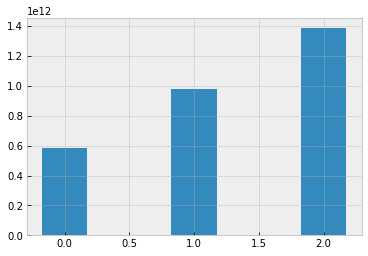

In [16]:
costs = [n1.objective,n2.objective,n3.objective]
x = np.arange(len(costs))  # the label locations
width = 0.35  # the width of the bars

plt.bar(x,costs,width)#,2,n2.objective,3,n3.objective) #billion EUR p.a.

In [9]:
n3_2 = pypsa.Network("results/highBiomass1bio-lowS/postnetworks/elec_s_37_lvopt__Co2Lm0p20-97H-T-H-B-I-bioT-hvdc_2050.nc")

/home/millinger/miniconda3/envs/pypsa-eur/lib/python3.8/site-packages/pypsa/io.py:769: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead
  pnl[attr] = pnl[attr].reindex(columns=df.index | columns, fill_value=default)
/home/millinger/miniconda3/envs/pypsa-eur/lib/python3.8/site-packages/pypsa/io.py:771: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead
  pnl[attr] = pnl[attr].reindex(columns=(pnl[attr].columns | columns))
INFO:pypsa.io:Imported network elec_s_37_lvopt__Co2Lm0p20-97H-T-H-B-I-bioT-hvdc_2050.nc has buses, carriers, generators, global_constraints, links, loads, storage_units, stores


In [11]:
n2_2 = pypsa.Network("results/highBiomass0.5bio-lowS/postnetworks/elec_s_37_lvopt__Co2Lm0p20-97H-T-H-B-I-bioT-hvdc_2050.nc")

/home/millinger/miniconda3/envs/pypsa-eur/lib/python3.8/site-packages/pypsa/io.py:769: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead
  pnl[attr] = pnl[attr].reindex(columns=df.index | columns, fill_value=default)
/home/millinger/miniconda3/envs/pypsa-eur/lib/python3.8/site-packages/pypsa/io.py:771: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead
  pnl[attr] = pnl[attr].reindex(columns=(pnl[attr].columns | columns))
INFO:pypsa.io:Imported network elec_s_37_lvopt__Co2Lm0p20-97H-T-H-B-I-bioT-hvdc_2050.nc has buses, carriers, generators, global_constraints, links, loads, storage_units, stores


In [38]:
n1_2_min20 = pypsa.Network("results/highBiomass0bio-lowS/postnetworks/elec_s_37_lvopt__Co2Lm0p20-97H-T-H-B-I-bioT-hvdc_2050.nc")
n1_2_05 = pypsa.Network("results/highBiomass0bio-lowS/postnetworks/elec_s_37_lvopt__Co2L0p05-97H-T-H-B-I-bioT-hvdc_2050.nc")

n1_1_min20 = pypsa.Network("results/highBiomass0bio-S/postnetworks/elec_s_37_lvopt__Co2Lm0p20-97H-T-H-B-I-bioT-hvdc_2050.nc")
n1_1_05 = pypsa.Network("results/highBiomass0bio-S/postnetworks/elec_s_37_lvopt__Co2L0p05-97H-T-H-B-I-bioT-hvdc_2050.nc")


n2_2_min20 = pypsa.Network("results/highBiomass0.5bio-lowS/postnetworks/elec_s_37_lvopt__Co2Lm0p20-97H-T-H-B-I-bioT-hvdc_2050.nc")
n2_2_05 = pypsa.Network("results/highBiomass0.5bio-lowS/postnetworks/elec_s_37_lvopt__Co2L0p05-97H-T-H-B-I-bioT-hvdc_2050.nc")

n2_1_min20 = pypsa.Network("results/highBiomass0.5bio-S/postnetworks/elec_s_37_lvopt__Co2Lm0p20-97H-T-H-B-I-bioT-hvdc_2050.nc")
n2_1_05 = pypsa.Network("results/highBiomass0.5bio-S/postnetworks/elec_s_37_lvopt__Co2L0p05-97H-T-H-B-I-bioT-hvdc_2050.nc")


n3_2_min20 = pypsa.Network("results/highBiomass1bio-lowS/postnetworks/elec_s_37_lvopt__Co2Lm0p20-97H-T-H-B-I-bioT-hvdc_2050.nc")
n3_2_05 = pypsa.Network("results/highBiomass1bio-lowS/postnetworks/elec_s_37_lvopt__Co2L0p05-97H-T-H-B-I-bioT-hvdc_2050.nc")

n3_1_min20 = pypsa.Network("results/highBiomass1bio-S/postnetworks/elec_s_37_lvopt__Co2Lm0p20-97H-T-H-B-I-bioT-hvdc_2050.nc")
n3_1_05 = pypsa.Network("results/highBiomass1bio-S/postnetworks/elec_s_37_lvopt__Co2L0p05-97H-T-H-B-I-bioT-hvdc_2050.nc")


/home/millinger/miniconda3/envs/pypsa-eur/lib/python3.8/site-packages/pypsa/io.py:769: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead
  pnl[attr] = pnl[attr].reindex(columns=df.index | columns, fill_value=default)
/home/millinger/miniconda3/envs/pypsa-eur/lib/python3.8/site-packages/pypsa/io.py:771: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead
  pnl[attr] = pnl[attr].reindex(columns=(pnl[attr].columns | columns))
INFO:pypsa.io:Imported network elec_s_37_lvopt__Co2Lm0p20-97H-T-H-B-I-bioT-hvdc_2050.nc has buses, carriers, generators, global_constraints, links, loads, storage_units, stores
/home/millinger/miniconda3/envs/pypsa-eur/lib/python3.8/site-packages/pypsa/io.py:769: FutureWarning: Index.__or__ operating as a set operation is d

/home/millinger/miniconda3/envs/pypsa-eur/lib/python3.8/site-packages/pypsa/io.py:769: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead
  pnl[attr] = pnl[attr].reindex(columns=df.index | columns, fill_value=default)
/home/millinger/miniconda3/envs/pypsa-eur/lib/python3.8/site-packages/pypsa/io.py:771: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead
  pnl[attr] = pnl[attr].reindex(columns=(pnl[attr].columns | columns))
INFO:pypsa.io:Imported network elec_s_37_lvopt__Co2Lm0p20-97H-T-H-B-I-bioT-hvdc_2050.nc has buses, carriers, generators, global_constraints, links, loads, storage_units, stores
/home/millinger/miniconda3/envs/pypsa-eur/lib/python3.8/site-packages/pypsa/io.py:769: FutureWarning: Index.__or__ operating as a set operation is d

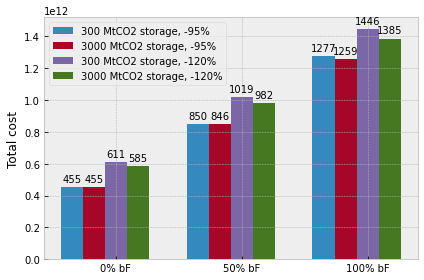

In [53]:
labels = ['0% bF','50% bF','100% bF']

costs1 = [n1_1_min20.objective,n2_1_min20.objective,n3_1_min20.objective]
costs2 = [n1_2_min20.objective,n2_2_min20.objective,n3_2_min20.objective]
costs3 = [n1_1_05.objective,n2_1_05.objective,n3_1_05.objective]
costs4 = [n1_2_05.objective,n2_2_05.objective,n3_2_05.objective]
x = np.arange(len(costs))  # the label locations
width = 0.35  # the width of the bars

#plt.bar(x,costs,width)#,2,n2.objective,3,n3.objective) #billion EUR p.a.
fig, ax = plt.subplots()
rects1 = ax.bar(x - width, costs4, width/2, label='300 MtCO2 storage, -95%')
rects2 = ax.bar(x - width/2, costs3, width/2, label='3000 MtCO2 storage, -95%')
rects3 = ax.bar(x, costs2, width/2, label='300 MtCO2 storage, -120%')
rects4 = ax.bar(x + width/2, costs1, width/2, label='3000 MtCO2 storage, -120%')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Total cost')
#ax.set_title('Scores by group and gender')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = int(rect.get_height() / 1e9)
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height*1e9),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)

fig.tight_layout()
